In [1]:
#import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

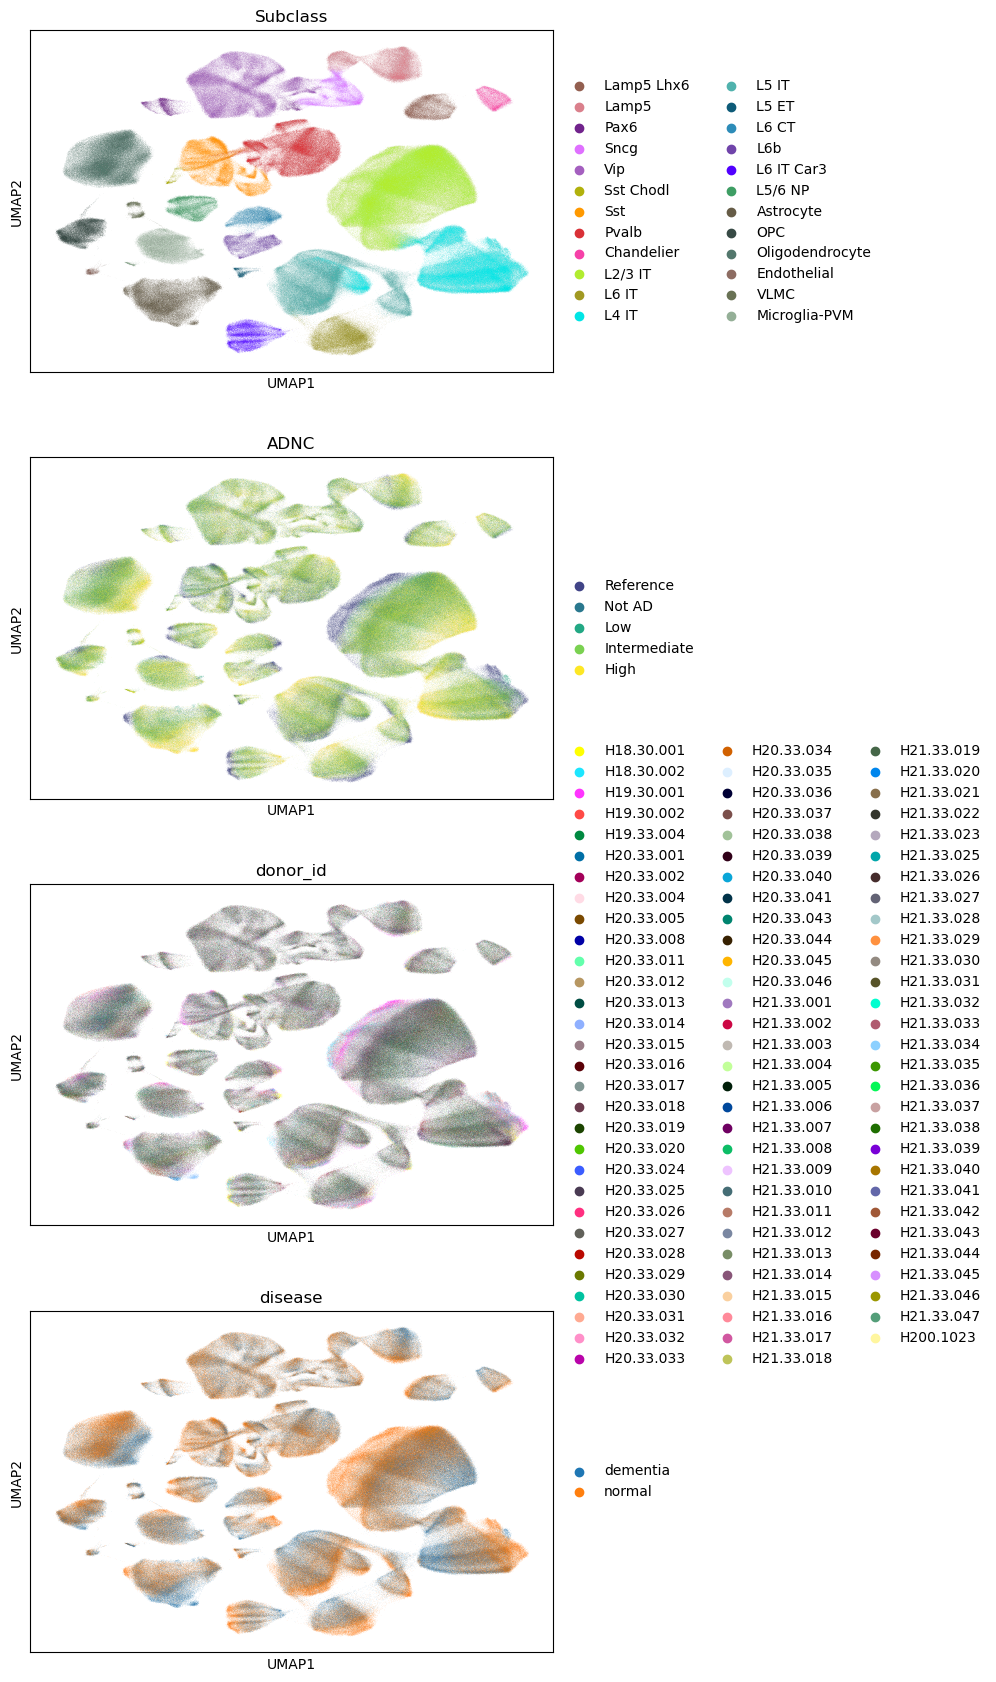

In [2]:
adata=sc.read_h5ad("./data/AD.h5ad")
adata.raw = None
sc.pl.umap(adata,color=["Subclass","ADNC","donor_id","disease"],ncols=1)

In [3]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key="disease", contorl_name='normal', num_hvg=2000, require_batch=True,
                            batch_key='donor_id',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=8192, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./AD/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./AD/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()

'''
model.get_modifier_space()
model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
'''

Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[donor_id] back up to adata.obs['batch_backup']
Original adata.obs[disease] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'normal': 0, 'dementia': 1}
Condition mapping to adata.obs['batch']: {'donor_id': {'H20.33.034': 0, 'H21.33.035': 1, 'H20.33.014': 2, 'H21.33.015': 3, 'H20.33.033': 4, 'H21.33.043': 5, 'H21.33.005': 6, 'H20.33.031': 7, 'H21.33.036': 8, 'H21.33.002': 9, 'H20.33.025': 10, 'H21.33.047': 11, 'H21.33.040': 12, 'H20.33.001': 13, 'H21.33.026': 14, 'H21.33.008': 15, 'H21.33.001': 16, 'H20.33.046': 17, 'H20.33.040': 18, 'H20.33.002': 19, 'H21.33.025': 20, 'H20.33.026': 21, 'H21.33.018': 22, 'H19.33.004': 23, 'H19.30.001': 24, 'H21.33.019': 25, 'H21.33.013': 26, 'H20.33.020': 27, 'H21.33.022': 28, 'H20.33.041': 29, 'H20.33.018': 30, 'H21.33.004': 31, 'H21.33.011': 32, 'H20.33.044': 33, 'H19.30.002': 34, 'H20.33.012': 35, 'H21.33.041': 36, 'H21.33.006

Overall Progress:   0%|          | 0/29 [00:00<?, ?it/s]

Resetting 798 unused embeddings.
Resetting 802 unused embeddings.
Resetting 815 unused embeddings.
Resetting 778 unused embeddings.
Resetting 792 unused embeddings.
Resetting 820 unused embeddings.
Resetting 813 unused embeddings.
Resetting 818 unused embeddings.
Resetting 805 unused embeddings.
Resetting 829 unused embeddings.
Resetting 799 unused embeddings.
Resetting 840 unused embeddings.
Resetting 808 unused embeddings.
Resetting 793 unused embeddings.
Resetting 809 unused embeddings.
Resetting 813 unused embeddings.
Resetting 855 unused embeddings.
Resetting 830 unused embeddings.
Resetting 825 unused embeddings.
Resetting 831 unused embeddings.
Resetting 793 unused embeddings.
Resetting 811 unused embeddings.
Resetting 804 unused embeddings.
Resetting 827 unused embeddings.
Resetting 826 unused embeddings.
Resetting 827 unused embeddings.
Resetting 809 unused embeddings.
Resetting 826 unused embeddings.
Resetting 819 unused embeddings.
Resetting 786 unused embeddings.
Resetting 

'\nmodel.get_modifier_space()\nmodel.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)\nmodel.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)\n'

In [4]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key="disease", contorl_name='normal', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=8192, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./AD_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./AD_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
'''
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
'''

Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[disease] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'normal': 0, 'dementia': 1}
Condition mapping to adata.obs['batch']: {'batch': {0: 0}}
Unique batch mapping: {0: 0}
Calculating the clusters
Unique groups: ['0_dementia' '0_normal']
Finished clustering
Data preprocessing done
Remaining number of cells: 1378211
Too few epoches (steps, if rigorously speaking). Changing epoch to 1288 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {0: 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'normal': 0, 'dementia': 1}
Preprocessing time: 3350.51842 seconds


Overall Progress:   0%|          | 0/1288 [00:00<?, ?it/s]

Epoch: 1/1288 | All Loss: 69.6868 | Neighborhood Loss: 27.2523 | Triplet Loss: 33.3724 | Reconstruction Loss: 15.0224 | Independent Loss: 3.2709 | KL Loss: 0.4087 | Commitment Loss: 0.5669 | Dependent Loss: -10.2068
Epoch: 2/1288 | All Loss: 40.3890 | Neighborhood Loss: 26.2392 | Triplet Loss: 12.7394 | Reconstruction Loss: 10.1780 | Independent Loss: 2.1596 | KL Loss: 0.5039 | Commitment Loss: 0.5496 | Dependent Loss: -11.9807
Epoch: 3/1288 | All Loss: 34.2737 | Neighborhood Loss: 25.9240 | Triplet Loss: 8.9200 | Reconstruction Loss: 9.0309 | Independent Loss: 1.8455 | KL Loss: 0.5649 | Commitment Loss: 0.5461 | Dependent Loss: -12.5577
Epoch: 4/1288 | All Loss: 30.1873 | Neighborhood Loss: 25.1142 | Triplet Loss: 6.6981 | Reconstruction Loss: 8.7019 | Independent Loss: 1.4234 | KL Loss: 0.5703 | Commitment Loss: 0.5468 | Dependent Loss: -12.8673
Epoch: 5/1288 | All Loss: 27.9984 | Neighborhood Loss: 24.1928 | Triplet Loss: 5.5523 | Reconstruction Loss: 8.4517 | Independent Loss: 1.75

'\nmodel.get_modifier_space()\n\nmodel.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)\nmodel.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)\n'